In [1]:
#Велосипед, если не установлен модуль
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm




import functions as f
import func_generator as fg


from GA import GA
import PARAMS as P
from Base import Base


import random
import numpy as np
from matplotlib import pyplot as plt


######################################################################################
func_list = np.array([f.linear, f.sin, f.ln, f.sqrt, f.my_abs, f.sqr, f.hyper, f.exp])

# Настройка области определения

In [2]:
#Граници по оси Х
left_border = 0 #от
right_border = 100 #до


##########
interval = [left_border, right_border]

# Генерация функции

 +0.0984771045 × |+1.009715x -0.057494| -0.3448925784 × ln(+1.526887x -2.895346) -1.152974


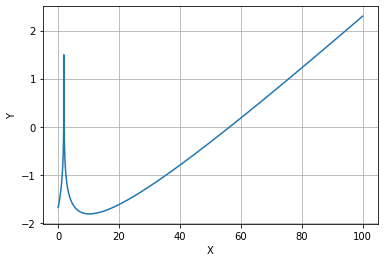

In [3]:
#число базовых ф-й, уч-х в генерации основной [1;8]
kol_funcs = 2 


#Смещение по оси Y
dy_down = -2     # от
dy_up   = 2      # до


#Непонятный параметр
chances_count = 2

####################
#Генерируем саму ф-ю
f, f_str = fg.generate_complex_function(func_list, 
                                         complexity = kol_funcs, 
                                         chances_count = chances_count, 
                                         dy_range = [dy_down, dy_up]
                                       )

print(f_str)
plt.plot(np.linspace(interval[0],interval[1],10000),
         [f(x) for x in np.linspace(interval[0],interval[1],10000)]
)

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# Настройка генерации датасета

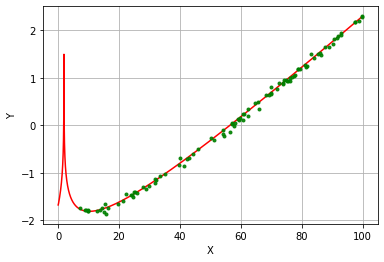

In [4]:
dots_count = 100   # число точек в датасете
noise      = 0.05   # величина шума (чем больше - тем зашумлённей данные)



####################
# Создаём датасет
data = fg.generate_dataset(f, dots_count = dots_count, x_range = interval, noise_ratio = noise)

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(np.linspace(interval[0],interval[1],10000),
         [f(x) for x in np.linspace(interval[0],interval[1],10000)],
         'r'
)

plt.plot(data[0], data[1], '.g', alpha = 0.9)
plt.show()

# Задание параметров алгоритма

Инструкция по настройке:
tip - какой вариант алгоритма будет использоваться, может принимать значения:
- 0 - первая версия (выбираем 2 лучших представителя, делаем кучу копий, в каждой копии заменяем по одному нуклеотиду)
- 1 - Канонический ГА
- 2 - Генитор
- 3 - СНС
- 4 - С нефиксированным размером популяции (оооооооооочень медленный)

steps - число итераций в алгоритме

100%|██████████| 10000/10000 [04:56<00:00, 33.68it/s]


h(x) =   -0.4549426032 × (0.577538x +0.823633) 
 +3.8956631880 × sin(0.025393x -0.096312) 
 +2.6905103608 × ln(0.433959x +4.831320) 
 +0.4321303590 × √(1.540365x +2.189601) 
 +2.8668685797 × |0.012412x -0.337837| 
 +1.7816333337 × (0.201940x +0.140264)² 
 +1.0410089197 × (0.143843x +0.512816)³ 
 +3.0553842910 × exp(0.001858x -0.252618) 
 -10.738001

Значение целевой функции:
h_pr = [0.75448476];
f_pr = [0.25877214]

СКО:
h_sko = [0.08686108];
f_sko = [0.05086965]


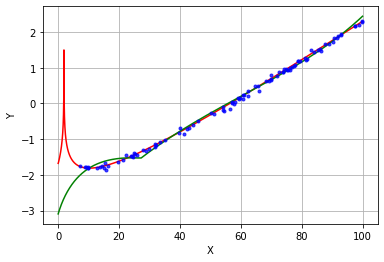

In [5]:
tip = 2 #от 0 до 4
steps = 10000


##########################################################
##########################################################
##########################################################
h, h_pr, h_str = Base["funcs"]["Go"](GA[tip], func_list, data, steps)

X = np.linspace(interval[0], interval[1], 10000)
fY = [f(x) for x in X]
hY = [h(x) for x in X]

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X, fY, 'r')
plt.plot(X, hY, 'g', alpha = 0.99)
plt.plot(data[0], data[1], '.b', alpha = 0.75)


print('h(x) = ', h_str)

print("\nЗначение целевой функции:")
print('h_pr = {};\nf_pr = {}'.format(h_pr, Base["funcs"]["E"](data[1],[f(x)for x in data[0]])))

print("\nСКО:")
print('h_sko = {};\nf_sko = {}'.format(
    (h_pr/len(data[0]))**0.5, 
    (Base["funcs"]["E"](data[1],[f(x)for x in data[0]])/len(data[0]))**0.5
))

plt.show()